<a href="https://colab.research.google.com/github/Nadiam75/DeepLearning_HW_2/blob/main/transferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## imports

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!wget -nc https://raw.githubusercontent.com/Nadiam75/DeepLearning_HW_2/main/imageNetLabels.py

File ‘imageNetLabels.py’ already there; not retrieving.



In [4]:
import tensorflow as tf  
print(tf.__version__)    
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.nasnet import NASNetMobile, NASNetLarge, preprocess_input
import imageNetLabels
from keras.callbacks import ModelCheckpoint   
import time
from sklearn.model_selection import train_test_split
import cv2
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from tensorflow.python.keras.layers.pooling import GlobalMaxPool2D


2.7.0


In [5]:
dictionary = imageNetLabels.IMAGENET_CLASSES
mobileDim = (224, 224 )
largeDim = (331 ,331)
shape_large = (1 , 331 ,331 , 3)
shape_mobile = (1, 224 , 224, 3)
mobile = (224, 224, 3)
large  = (331, 331 ,3)

## define and test model

In [6]:
def get_model_classif_nasnet():
    inputs = Input(large)
    xx = tf.cast(inputs, tf.float32)
    xxx = tf.keras.applications.nasnet.preprocess_input(xx)
    base_model = NASNetLarge(include_top=True, input_shape=large , weights = 'imagenet' )
    base_model.trainable = False
    x = base_model(xxx)
    model = Model(inputs, x)
    model.summary(  )
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])
    return model , base_model

In [7]:
model , base_model = get_model_classif_nasnet()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 331, 331, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 331, 331, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 331, 331, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 331, 331, 3)      0         
 a)                                                              
                                                                 
 NASNet (Functional)         (None, 1000)              88949818  
                                                                 
Total params: 88,949,818
Trainable params: 0
Non-trainable pa

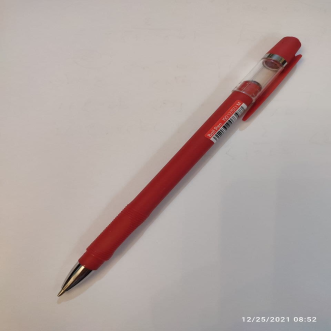

In [8]:
ballpoint = cv2.imread('ballpen.jpg' , cv2.IMREAD_UNCHANGED)
# cv2_imshow(ballpoint)
resizedballpoint = cv2.resize(ballpoint, largeDim, interpolation = cv2.INTER_AREA)
resizedballpoint.shape
cv2_imshow(resizedballpoint)

In [9]:
array = model.predict (np.reshape( resizedballpoint , shape_large) )
tf.keras.applications.nasnet.decode_predictions( array, top=5 )

[[('n02783161', 'ballpoint', 0.86631215),
  ('n04116512', 'rubber_eraser', 0.006280166),
  ('n06785654', 'crossword_puzzle', 0.004073032),
  ('n03658185', 'letter_opener', 0.0010049171),
  ('n03388183', 'fountain_pen', 0.0009728647)]]

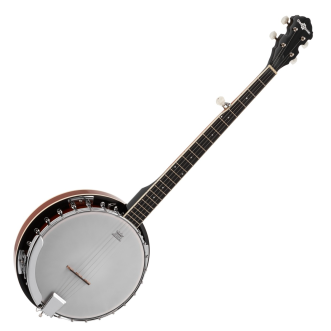

In [10]:
banjo = cv2.imread('banjo.jpg' , cv2.IMREAD_UNCHANGED)
# cv2_imshow(ballpoint)
resizedbanjo = cv2.resize(banjo, largeDim, interpolation = cv2.INTER_AREA)
resizedbanjo.shape
cv2_imshow(resizedbanjo)

In [11]:
array = model.predict (np.reshape( resizedbanjo , shape_large) )
tf.keras.applications.nasnet.decode_predictions( array, top=5 )

[[('n02787622', 'banjo', 0.8982173),
  ('n03249569', 'drum', 0.00044679872),
  ('n04536866', 'violin', 0.00042520507),
  ('n02672831', 'accordion', 0.00040374626),
  ('n02992211', 'cello', 0.00038404626)]]

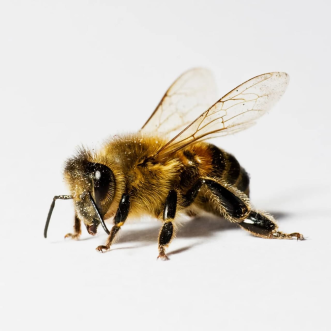

In [14]:
book = cv2.imread('bee.jpg' , cv2.IMREAD_UNCHANGED)
# cv2_imshow(ballpoint)
resizedbook = cv2.resize(book, largeDim, interpolation = cv2.INTER_AREA)
cv2_imshow(resizedbook)

In [15]:
array = model.predict (np.reshape( resizedbook , shape_large) )
tf.keras.applications.nasnet.decode_predictions( array, top=5 )

[[('n02206856', 'bee', 0.8288701),
  ('n02190166', 'fly', 0.023801522),
  ('n03530642', 'honeycomb', 0.003103787),
  ('n07730033', 'cardoon', 0.0024947503),
  ('n02727426', 'apiary', 0.0019691782)]]

## visualize features

In [16]:
dim1 = 5
dim2 = 6

In [17]:
model = NASNetLarge(include_top=True, input_shape=large , weights = 'imagenet' )


In [18]:
for i , layer in enumerate(model.layers):
    if 'normal_conv' not in layer.name:
      continue
    print(i, layer.name, layer.output.shape)

117 normal_conv_1_0 (None, 42, 42, 168)
162 normal_conv_1_1 (None, 42, 42, 168)
207 normal_conv_1_2 (None, 42, 42, 168)
252 normal_conv_1_3 (None, 42, 42, 168)
297 normal_conv_1_4 (None, 42, 42, 168)
342 normal_conv_1_5 (None, 42, 42, 168)
444 normal_conv_1_7 (None, 21, 21, 336)
489 normal_conv_1_8 (None, 21, 21, 336)
534 normal_conv_1_9 (None, 21, 21, 336)
579 normal_conv_1_10 (None, 21, 21, 336)
624 normal_conv_1_11 (None, 21, 21, 336)
669 normal_conv_1_12 (None, 21, 21, 336)
771 normal_conv_1_13 (None, 11, 11, 672)
816 normal_conv_1_14 (None, 11, 11, 672)
861 normal_conv_1_15 (None, 11, 11, 672)
906 normal_conv_1_16 (None, 11, 11, 672)
951 normal_conv_1_17 (None, 11, 11, 672)
996 normal_conv_1_18 (None, 11, 11, 672)


In [19]:
model = Model(inputs=model.inputs, outputs=[model.layers[117].output , model.layers[162].output , model.layers[951].output , model.layers[996].output])
img = load_img('bee.jpg', target_size=largeDim)
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)
xx = tf.cast(img, tf.float32)
xxx = tf.keras.applications.nasnet.preprocess_input(xx)


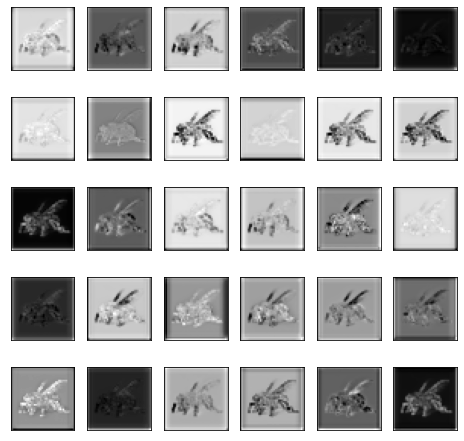

In [20]:
feature_maps = model.predict(xxx)[0]
ix = 1
plt.figure(figsize = (8 , 8))
for _ in range(dim1):
	for _ in range(dim2):
		ax = pyplot.subplot(dim1, dim2, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
pyplot.show()

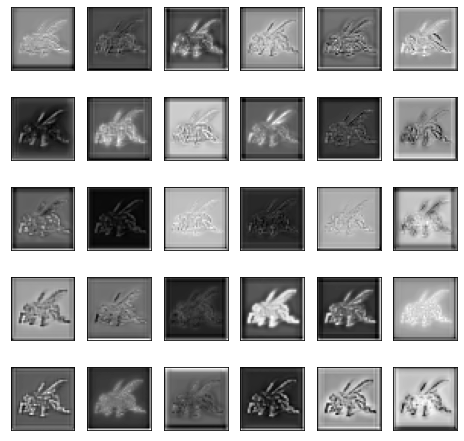

In [21]:
feature_maps = model.predict(xxx)[1]
ix = 1
plt.figure(figsize = (8 , 8))
for _ in range(dim1):
	for _ in range(dim2):
		ax = pyplot.subplot(dim1, dim2, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
pyplot.show()

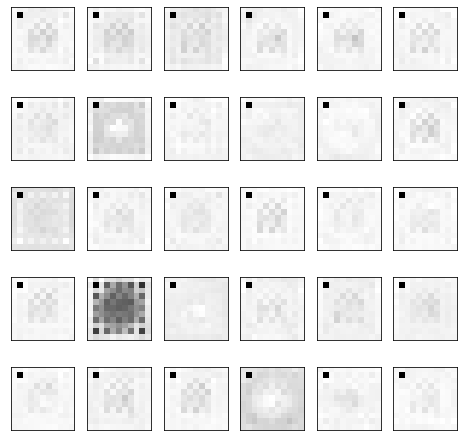

In [22]:
feature_maps = model.predict(xxx)[2]
ix = 1
plt.figure(figsize = (8 , 8))
for _ in range(dim1):
	for _ in range(dim2):
		ax = pyplot.subplot(dim1, dim2, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
pyplot.show()

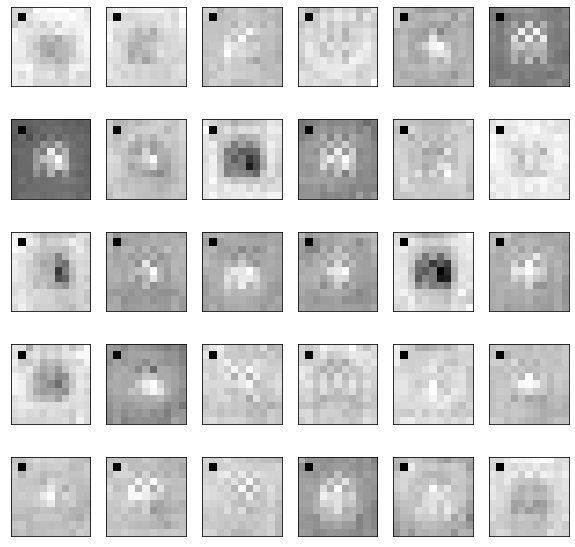

In [23]:
feature_maps = model.predict(xxx)[3]
ix = 1
plt.figure(figsize = (10 , 10))

for _ in range(dim1):
	for _ in range(dim2):
		ax = pyplot.subplot(dim1, dim2, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
pyplot.show()

#test

In [25]:
import zipfile
import os

In [26]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/cats_and_dogs_filtered.zip

--2021-12-25 19:15:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M   234MB/s    in 0.3s    

2021-12-25 19:15:09 (234 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [27]:
load_zip ='/content/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(load_zip,'r')
zip_ref.extractall('/content')
zip_ref.close()

In [28]:
base_dir='/content/cats_and_dogs_filtered'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

In [29]:
train_dir = '/content/cats_and_dogs_filtered/train'
validation_dir = '/content/cats_and_dogs_filtered/validation' 

In [105]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=32,
                                                            image_size=mobileDim)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=32,
                                                                 image_size=mobileDim)

train_dataset_large = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=32,
                                                            image_size=largeDim)

validation_dataset_large = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=32,
                                                                 image_size=largeDim)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

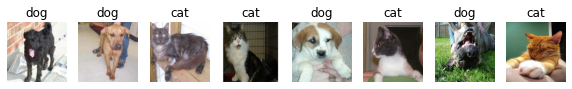

In [89]:
classNames = ['cat', 'dog']
plt.figure(figsize=(10, 40))
for images, labels in train_dataset.take(1):
  for i in range(8):
    ax = plt.subplot(1, 8, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classNames[labels[i]])
    plt.axis("off")

In [109]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

val_batches_large = tf.data.experimental.cardinality(validation_dataset_large)
test_dataset_large = validation_dataset_large.take(val_batches_large // 5)
validation_dataset_large = validation_dataset_large.skip(val_batches_large // 5)

In [110]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 21
Number of test batches: 5


In [111]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

train_dataset_large = train_dataset_large.prefetch(buffer_size=AUTOTUNE)
validation_dataset_large = validation_dataset_large.prefetch(buffer_size=AUTOTUNE)
test_dataset_large = test_dataset_large.prefetch(buffer_size=AUTOTUNE)

## two class classification

In [112]:
def getNASNETlargeModel():
    inputs = Input(large)
    xxx = tf.keras.applications.nasnet.preprocess_input(inputs)
    base_model = NASNetLarge(include_top=False, input_shape=large , weights = 'imagenet' )
    base_model.trainable = False
    x = base_model(xxx)
    out3 = GlobalMaxPool2D()(x)
    out2 = Dropout(0.5)(out3)
    out = Dense(1, activation=tf.keras.activations.sigmoid, name="1_")(out2)
    model = Model(inputs, out)
    model.summary(  )
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.01)  ,loss=tf.keras.losses.binary_crossentropy, metrics=['acc'])
    return model

In [113]:
model = getNASNETlargeModel()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 331, 331, 3)]     0         
                                                                 
 tf.math.truediv_7 (TFOpLamb  (None, 331, 331, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_7 (TFOpLam  (None, 331, 331, 3)      0         
 bda)                                                            
                                                                 
 NASNet (Functional)         (None, 11, 11, 4032)      84916818  
                                                                 
 tf.math.reduce_max_4 (TFOpL  (None, 4032)             0         
 ambda)                                                          
                                                           

In [115]:
trainHistory = model.fit(train_dataset_large, batch_size = 32 , epochs=3,  validation_data = validation_dataset_large , shuffle=True)

Epoch 1/3
63/63 [==============================] - 172s 3s/step - loss: 0.0736 - acc: 0.9955 - val_loss: 0.0719 - val_acc: 0.9954
Epoch 2/3
63/63 [==============================] - 171s 3s/step - loss: 0.0738 - acc: 0.9940 - val_loss: 0.1397 - val_acc: 0.9923
Epoch 3/3
63/63 [==============================] - 171s 3s/step - loss: 0.1268 - acc: 0.9950 - val_loss: 0.2530 - val_acc: 0.9923


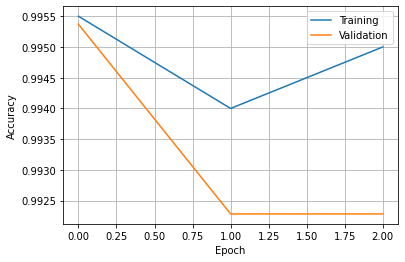

5/5 [==============================] - 11s 2s/step - loss: 0.0018 - acc: 1.0000
0.0018197537865489721
1.0


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [119]:
plt.plot(trainHistory.history['acc'])
plt.plot(trainHistory.history['val_acc'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()
 
(loss, accuracy) = model.evaluate(test_dataset_large)
print(loss)
print(accuracy)
 
model.save('largemodel.h5')

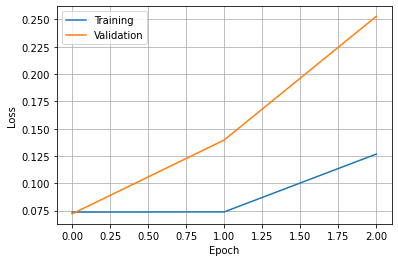

In [120]:
plt.plot(trainHistory.history['loss'])
plt.plot(trainHistory.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()
 


In [121]:
def nasnetmobilemodel():
    inputs = Input(mobile)
    xxx = tf.keras.applications.nasnet.preprocess_input(inputs)
    base_model = NASNetMobile(include_top=False, input_shape=mobile , weights = 'imagenet' )
    base_model.trainable = False
    for layer in base_model.layers:
      layer.trainable=False
    x1 = base_model(xxx)
    x2 = GlobalAveragePooling2D()(x1)
    x3 = tf.keras.layers.Dropout(0.2)(x2)

    out = tf.keras.layers.Dense(1)(x3)

    model = Model(inputs, out)
    model.summary(  )
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001)  ,loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
    return model

In [122]:
model = nasnetmobilemodel()


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_8 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_8 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 global_average_pooling2d_3   (None, 1056)             0         
 (GlobalAveragePooling2D)                                        
                                                           

In [123]:
import time
start = time.time() # for stopwatch
trainHistory = model.fit(train_dataset, batch_size = 32 , epochs=3,  validation_data= validation_dataset , shuffle=True)
end = time.time()
took = end -start
print("took %s seconds"%(took))


Epoch 1/3
63/63 [==============================] - 37s 314ms/step - loss: 0.7275 - accuracy: 0.5200 - val_loss: 0.5979 - val_accuracy: 0.6451
Epoch 2/3
63/63 [==============================] - 14s 216ms/step - loss: 0.5253 - accuracy: 0.7145 - val_loss: 0.4418 - val_accuracy: 0.7840
Epoch 3/3
63/63 [==============================] - 14s 216ms/step - loss: 0.3946 - accuracy: 0.8210 - val_loss: 0.3322 - val_accuracy: 0.8827
took 71.72097158432007 seconds


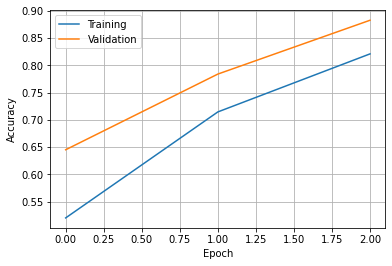

21/21 [==============================] - 4s 147ms/step - loss: 0.3365 - accuracy: 0.8735
0.33646395802497864
0.8734567761421204


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [124]:
plt.plot(trainHistory.history['accuracy'])
plt.plot(trainHistory.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()
 
(loss, accuracy) = model.evaluate(validation_dataset)
print(loss)
print(accuracy)
 
model.save('mobilemodel.h5')

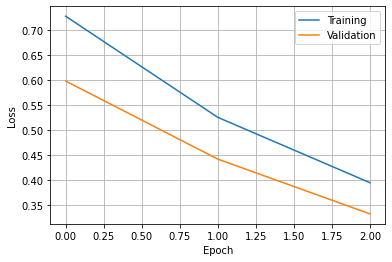

In [125]:
plt.plot(trainHistory.history['loss'])
plt.plot(trainHistory.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()
 
